# The Battle of Neighborhoods

## Introduction

The University of Southern California with its project named The Neighborhood Data for Social Change (NDSC) platform, provides different resources they said it is head to civic actors who want to learn about their neighborhood. The platform offers different areas of study such as demography, education, environment, health, among others. Taking advantage of all these data sets, especially of the demographic dataset, which provides information about the population distribution by age distribution, households, race and ethnicity, age distribution among others, it would be nice to understand the population distribution in Los Angeles by race and ethnicity to analyse where the different races are located and how the neighborhoods are clustered for the largest	groups of people in Los Angeles.
To do that, the idea is to find the two largest groups in Los Angeles by using the NDSC (White, Black, Hispanic, Asian...) classification, clustering them by utilizing the Foursquare API, and comparing them to understand similarities and differences among races.

The importance of this analysis is that persons who want to invest or live in one of those neighborhoods can understand the influence of races in their neighborhoods, and they can make decisions based on this analysis.


## Table of contents

1. <a href="#item1">Data Sources</a>

    1.1 <a href="#item1">Understanding the NDSC dataset Race & Ethnicity</a>
    
    1.2 <a href="#item1">Understanding the Foursquare API</a>
    

2. <a href="#item2">Methodology</a>


3. <a href="#item1">Analysis</a>


4. <a href="#item2">Results and Discussion</a>


5. <a href="#item2">Conclusion</a>



## 1- Data Sources

## Importing libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.6.16          |           py36_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## 1.1 Understanding the NDSC dataset = Race & Ethnicity

Race & Ethnicity has 7 years records from 2010  to 2016, 8 race and ethnicity classification, and 262 neighborhoods which provides 2344 location points with the latitude and logitude coordinates of each location point. 

Here is the link to the dataset: https://usc.data.socrata.com/api/views/jxw5-xxv5/rows.csv

For this analysis, we will use only records from 2016, so let´s prepare the data.

In [4]:
!wget -O urlRaceEthnicity.csv https://usc.data.socrata.com/api/views/jxw5-xxv5/rows.csv
dataframe= pd.read_csv('urlRaceEthnicity.csv')
dataframe.head()

--2019-06-30 02:30:35--  https://usc.data.socrata.com/api/views/jxw5-xxv5/rows.csv
Resolving usc.data.socrata.com (usc.data.socrata.com)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to usc.data.socrata.com (usc.data.socrata.com)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘urlRaceEthnicity.csv’

    [                    <=>                ] 33,463,156  7.79MB/s   in 4.0s   

2019-06-30 02:30:45 (7.97 MB/s) - ‘urlRaceEthnicity.csv’ saved [33463156]



,Policy Area,Dataset,Year,Variable,Count,Percent,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
0,Demography,Race & Ethnicity,2010,American Indian/Native Population,0.0,0.000000,"Census Tract 1011.22, Los Angeles County, Cali...",101122,Tujunga,1400000US06037101122,"(34.267357, -118.29024)",American_Indian/Native_Population_2010_1400000...,01/01/2010
1,Demography,Race & Ethnicity,2010,American Indian/Native Population,31.0,0.830431,"Census Tract 1014, Los Angeles County, California",101400,Tujunga,1400000US06037101400,"(34.244255, -118.296428)",American_Indian/Native_Population_2010_1400000...,01/01/2010
2,Demography,Race & Ethnicity,2010,American Indian/Native Population,17.0,0.923411,"Census Tract 1021.03, Los Angeles County, Cali...",102103,Shadow Hills,1400000US06037102103,"(34.224155, -118.354339)",American_Indian/Native_Population_2010_1400000...,01/01/2010
3,Demography,Race & Ethnicity,2010,American Indian/Native Population,0.0,0.000000,"Census Tract 1021.04, Los Angeles County, Cali...",102104,Shadow Hills,1400000US06037102104,"(34.216189, -118.3456235)",American_Indian/Native_Population_2010_1400000...,01/01/2010
4,Demography,Race & Ethnicity,2010,American Indian/Native Population,0.0,0.000000,"Census Tract 1021.05, Los Angeles County, Cali...",102105,Sun Valley,1400000US06037102105,"(34.210852, -118.3480495)",American_Indian/Native_Population_2010_1400000...,01/01/2010


Filter the year 2016

In [5]:
dataframe2016 = dataframe[dataframe['Year']==2016]
dataframe2016.head()

,Policy Area,Dataset,Year,Variable,Count,Percent,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
138,Demography,Race & Ethnicity,2016,Black Population,66.0,2.089930,"Census Tract 2715, Los Angeles County, California",271500,Mar Vista,1400000US06037271500,"(34.01663, -118.4375635)",Black_Population_2016_1400000US06037271500,01/01/2016
198,Demography,Race & Ethnicity,2016,Black Population,19.0,0.585697,"Census Tract 3112, Los Angeles County, California",311200,Burbank,1400000US06037311200,"(34.1714255, -118.3527755)",Black_Population_2016_1400000US06037311200,01/01/2016
317,Demography,Race & Ethnicity,2016,Black Population,136.0,3.448276,"Census Tract 3113, Los Angeles County, California",311300,Burbank,1400000US06037311300,"(34.173525, -118.342414)",Black_Population_2016_1400000US06037311300,01/01/2016
377,Demography,Race & Ethnicity,2016,Black Population,51.0,2.222222,"Census Tract 3114, Los Angeles County, California",311400,Burbank,1400000US06037311400,"(34.162038, -118.34958)",Black_Population_2016_1400000US06037311400,01/01/2016
455,Demography,Race & Ethnicity,2016,Black Population,161.0,2.931537,"Census Tract 3115, Los Angeles County, California",311500,Burbank,1400000US06037311500,"(34.164754, -118.33837)",Black_Population_2016_1400000US06037311500,01/01/2016


Split location into latitude and longitude

In [6]:
dataframe2016['latitude'], dataframe2016['longitude'] = dataframe2016['Location'].str.split(',', 1).str
dataframe2016['latitude'] = dataframe2016['latitude'].str.replace("(","")
dataframe2016['longitude'] = dataframe2016['longitude'].str.replace(")","")
dataframe2016['latitude'] = pd.to_numeric(dataframe2016['latitude'])
dataframe2016['longitude'] = pd.to_numeric(dataframe2016['longitude'])
dataframe2016.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Policy Area,Dataset,Year,Variable,Count,Percent,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date,latitude,longitude
138,Demography,Race & Ethnicity,2016,Black Population,66.0,2.089930,"Census Tract 2715, Los Angeles County, California",271500,Mar Vista,1400000US06037271500,"(34.01663, -118.4375635)",Black_Population_2016_1400000US06037271500,01/01/2016,34.016630,-118.437563
198,Demography,Race & Ethnicity,2016,Black Population,19.0,0.585697,"Census Tract 3112, Los Angeles County, California",311200,Burbank,1400000US06037311200,"(34.1714255, -118.3527755)",Black_Population_2016_1400000US06037311200,01/01/2016,34.171425,-118.352775
317,Demography,Race & Ethnicity,2016,Black Population,136.0,3.448276,"Census Tract 3113, Los Angeles County, California",311300,Burbank,1400000US06037311300,"(34.173525, -118.342414)",Black_Population_2016_1400000US06037311300,01/01/2016,34.173525,-118.342414
377,Demography,Race & Ethnicity,2016,Black Population,51.0,2.222222,"Census Tract 3114, Los Angeles County, California",311400,Burbank,1400000US06037311400,"(34.162038, -118.34958)",Black_Population_2016_1400000US06037311400,01/01/2016,34.162038,-118.349580
455,Demography,Race & Ethnicity,2016,Black Population,161.0,2.931537,"Census Tract 3115, Los Angeles County, California",311500,Burbank,1400000US06037311500,"(34.164754, -118.33837)",Black_Population_2016_1400000US06037311500,01/01/2016,34.164754,-118.338370


Drop columns we do not need

In [7]:
dataframe2016 = dataframe2016.drop(columns=['Policy Area','Dataset','Tract','GEOID','Row ID','Date','Percent','Year','Tract Number','Location'])
dataframe2016.head()

,Variable,Count,Neighborhood,latitude,longitude
138,Black Population,66.0,Mar Vista,34.016630,-118.437563
198,Black Population,19.0,Burbank,34.171425,-118.352775
317,Black Population,136.0,Burbank,34.173525,-118.342414
377,Black Population,51.0,Burbank,34.162038,-118.349580
455,Black Population,161.0,Burbank,34.164754,-118.338370


Let´s see the distribution of the population by Race

In [8]:
#Creating Dataframe
df2016 = pd.DataFrame(data=dataframe2016, columns=['Variable','Count'])
df2016 = df2016.groupby(['Variable']).sum()
df2016= df2016.reset_index()
df2016.sort_values(by=['Count'], ascending=False)

,Variable,Count
3,Hispanic Population,4861648.0
7,White Population,2687787.0
1,Asian Population,1413105.0
2,Black Population,801182.0
6,Population of Two or More Races,220878.0
5,Other Race Population,29351.0
4,Native Hawaiian/Other Pacific Islander Population,24439.0
0,American Indian/Native Population,18765.0


As we can see, the Hispanic population and the White population are the two largest population groups, so that we are going to work with these groups.

## 1.2 Understanding the Foursquare API

The Foursquare API is a source for developers who want to search for a specific type of venue around a given location as well as a specific venue with data such as the full address, working hours, menu among others. Furthermore, it can possible to explore popular spots in a given location and trending venues as well.

Here is the API link is: https://api.foursquare.com/v2/venues/search?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT

where:

<div style="margin-top: 20px">

<font size = 3>

1. <a>CLIENT_ID = your Foursquare ID</a>
2. <a>CLIENT_SECRET =  your Foursquare Secret</a>
3. <a>LATITUDE = latitude of the given place</a>
4. <a>LONGITUDE = longitude of the given place</a>
5. <a>VERSION = date of the  database version 'yyyymmdd'</a>
6. <a>QUERY = the value you want to search</a>
7. <a>RADIUS = number of metter from the given place</a>
8. <a>LIMIT = number of records in the answer</a>

</font>
</div>

<div>

</div>

Important information: With your free Foursquare account you can access:

1. <a>105M places</a>
2. <a>2 Photos & 2 Tips per Venue</a>
3. <a>2 Queries per Second (QPS)</a>
4. <a>1 App per Account</a>
5. <a>Insight into API Usage</a>
6. <a>API Call Quota</a>
7. <a>99,500 Regular Calls + 500 Premium Calls</a>


Let´s see how we can call for venues for the first location point from the Race & Ethnicity dataset.

Define the credentials an parameters

In [9]:
# The code was removed by Watson Studio for sharing.

### Let´s see the venues around five  the location points given by the NDSC dataset

Creating a function to look for nearby venues

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Looking for nearby venues for the first 5 location points from the population dataset

In [11]:
LAX_venues = getNearbyVenues(names=dataframe2016['Neighborhood'].head(),
                                latitudes = dataframe2016['latitude'].head(),
                                longitudes = dataframe2016['longitude'].head()
                                  )

Mar Vista
Burbank
Burbank
Burbank
Burbank


In [12]:
print(LAX_venues.shape)
LAX_venues.head()

(58, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mar Vista,34.016630,-118.437563,Ocean View Farms,34.013712,-118.440426,Garden
1,Mar Vista,34.016630,-118.437563,north venice little league,34.014600,-118.440083,Baseball Field
2,Mar Vista,34.016630,-118.437563,Mountain View Outlook,34.017705,-118.441549,Scenic Lookout
3,Mar Vista,34.016630,-118.437563,VENICE GARDENS,34.015355,-118.442468,Garden
4,Burbank,34.171425,-118.352775,Emerald Knights Comics and Games,34.172974,-118.354616,Toy / Game Store


## Methodology

In this project, we will focus on the identification of similarities and differences among the two largest race and ethnicity populations in Los Angeles, especially in the neighborhoods in which each population group (2) has the most extensive participation. 

To do that, we will first analyze each population group (White, Hispanic...) by using graphical descriptions, grouping data and cleaning data. 

Second, we will select five neighborhoods for the two largest group. There are two approaches to do that. On one hand, we can select the neighborhoods in which the groups have the greatest amount of citizens. On the other hand, we can select the neighborhoods in which the groups have the highest participation rate. 

Third, We will cluster the location points given by the population dataset using **K-means clustering** the nearby venues in a **radius of 500 meters** , in order to understand how those neighborhoods are clustered and how each population group can influence those neighborhoods. 

Finally, we will discuss the findings and make conclusions around them.

## Analysis

Identify which population groups are the two largest

In [13]:
#Creating Dataframe
df2016 = pd.DataFrame(data=dataframe2016, columns=['Variable','Count'])
df2016 = df2016.groupby(['Variable']).sum()
df2016= df2016.reset_index()
df2016.sort_values(by=['Count'], ascending=False)

,Variable,Count
3,Hispanic Population,4861648.0
7,White Population,2687787.0
1,Asian Population,1413105.0
2,Black Population,801182.0
6,Population of Two or More Races,220878.0
5,Other Race Population,29351.0
4,Native Hawaiian/Other Pacific Islander Population,24439.0
0,American Indian/Native Population,18765.0


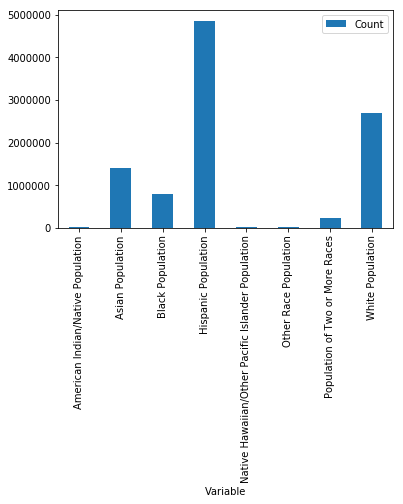

In [15]:
df2016.plot(kind='bar',x='Variable',y='Count')

Let´s create a dataframe only for Hispanic Population which is the first largest in Los Angeles


In [16]:
df2016_Hispanic = dataframe2016[dataframe2016['Variable']=='Hispanic Population']
df2016_Hispanic['Count'] = df2016_Hispanic['Count'].replace(np.nan,0)
print(df2016_Hispanic.shape)
df2016_Hispanic.sort_values(by=['Count'], ascending=False).head()

(2344, 5)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Variable,Count,Neighborhood,latitude,longitude
120953,Hispanic Population,8710.0,Palmdale,34.568801,-118.018343
120266,Hispanic Population,6940.0,East Los Angeles,34.015861,-118.184074
120365,Hispanic Population,6838.0,South Gate,33.939464,-118.195780
119773,Hispanic Population,6795.0,San Fernando,34.294876,-118.427307
120371,Hispanic Population,6665.0,Lynwood,33.921784,-118.182427


Group all neighborhoods and identify the first ten. 

In [17]:
#Creating Dataframe
group_hispanic = pd.DataFrame(data=df2016_Hispanic, columns=['Neighborhood','Count'])
group_hispanic.head()
#Grouping by
group_hispanic = group_hispanic.groupby(['Neighborhood']).sum()
group_hispanic= group_hispanic.reset_index()
group_hispanic.sort_values(by=['Count'], ascending=False).head(10)

,Neighborhood,Count
130,Long Beach,201132.0
65,East Los Angeles,117396.0
170,Pomona,107027.0
159,Palmdale,100370.0
201,South Gate,92865.0
58,Downey,88842.0
27,Boyle Heights,86783.0
50,Compton,75440.0
251,Westlake,75434.0
156,Norwalk,74715.0


### Now that we have identified the top 10
neighborhoods for Hispanic Population, let's check the participation rate with the total neighborhoods

Calculate the total for each Neighborhoods without filtering  

In [18]:
#Creating Dataframe
group_Neighborhoods = pd.DataFrame(data=dataframe2016, columns=['Neighborhood','Count'])
group_Neighborhoods.head()
#Grouping by PostalCode
group_Neighborhoods = group_Neighborhoods.groupby(['Neighborhood']).sum()
group_Neighborhoods= group_Neighborhoods.reset_index()
group_Neighborhoods.sort_values(by=['Count'], ascending=False).head()

,Neighborhood,Count
130,Long Beach,476623.0
190,Santa Clarita,195013.0
82,Glendale,191971.0
159,Palmdale,168089.0
170,Pomona,152353.0


Now, compare Hispanic participation with total participation for each neighborhood and identify the top 10.

In [19]:
df_mergeHispanic = pd.merge(group_Neighborhoods, group_hispanic, on='Neighborhood')
df_mergeHispanic['Percentage'] = df_mergeHispanic['Count_y'] / df_mergeHispanic['Count_x']
df_mergeHispanic.sort_values(by=['Percentage'], ascending=False, inplace=True)
df_mergeHispanic.head(10)

,Neighborhood,Count_x,Count_y,Percentage
140,Maywood,27672.0,27094.0,0.979112
104,Huntington Park,61630.0,59789.0,0.970128
65,East Los Angeles,121361.0,117396.0,0.967329
239,Walnut Park,15791.0,15197.0,0.962384
52,Cudahy,24106.0,23170.0,0.961171
21,Bell Gardens,42805.0,40867.0,0.954725
201,South Gate,97380.0,92865.0,0.953635
108,Irwindale,1319.0,1250.0,0.947688
20,Bell,35386.0,33091.0,0.935144
27,Boyle Heights,93164.0,86783.0,0.931508


Repeat the process for the second largest group which is White Population

In [20]:
df2016_white = dataframe2016[dataframe2016['Variable']=='White Population']
print(df2016_white.shape)
df2016_white.head()
#Creating Dataframe
group_white = pd.DataFrame(data=df2016_white, columns=['Neighborhood','Count'])
group_white.head(10)
#Grouping by PostalCode
group_white = group_white.groupby(['Neighborhood']).sum()
group_white= group_white.reset_index()
group_white.sort_values(by=['Count'], ascending=False).head(10)

(2344, 5)


,Neighborhood,Count
130,Long Beach,132849.0
82,Glendale,116983.0
190,Santa Clarita,93790.0
192,Santa Monica,60297.0
217,Torrance,59390.0
31,Burbank,59352.0
164,Pasadena,52565.0
122,Lancaster,51839.0
196,Sherman Oaks,50390.0
177,Redondo Beach,41960.0


Compare with the total Neighborhoods

In [21]:
df_mergeWhite = pd.merge(group_Neighborhoods, group_white, on='Neighborhood')
df_mergeWhite['Percentage'] = df_mergeWhite['Count_y'] / df_mergeWhite['Count_x']
df_mergeWhite.sort_values(by=['Percentage'], ascending=False).head(10)

,Neighborhood,Count_x,Count_y,Percentage
216,Topanga,9822.0,8328.0,0.847892
26,Beverlywood,4215.0,3551.0,0.842467
157,Pacific Palisades,24903.0,20644.0,0.828976
134,Malibu,7195.0,5909.0,0.821265
252,Westlake Village,4330.0,3546.0,0.818938
97,Hermosa Beach,19726.0,16127.0,0.817550
29,Brentwood,32463.0,26238.0,0.808243
23,Beverly Crest,11068.0,8884.0,0.802674
103,Hollywood Hills West,14218.0,11383.0,0.800605
25,Beverly Hills,34520.0,27610.0,0.799826


## Plot the top ten neighborhoods for both groups

Let´s first locate the coordinates for Los Angeles

In [22]:
address = 'Los Angeles, LA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


Add location points for both groups. The blue ones are Hispanic population and the red ones are White population

In [23]:
#Top 5 Hispanic Population
Top10_HispanicPopulation = df2016_Hispanic[df2016_Hispanic['Neighborhood'].isin(df_mergeHispanic['Neighborhood'].head(10))]
Top10_HispanicPopulation.head()
#Top 5 Hispanic Population
Top10_WhitePopulation = df2016_white[df2016_white['Neighborhood'].isin(df_mergeWhite['Neighborhood'].head(10))]
Top10_WhitePopulation.head()

,Variable,Count,Neighborhood,latitude,longitude
4388,White Population,1407.0,Arcadia,34.162478,-118.024155
4408,White Population,2119.0,Altadena,34.200921,-118.136652
126733,White Population,348.0,Arleta,34.233766,-118.429943
128149,White Population,426.0,Arleta,34.232289,-118.418041
128150,White Population,404.0,Arleta,34.245902,-118.428032


Now that we have selected the neighborhoods for both population groups, let's plot them in order to understand where they are located.

In [24]:
# create map of Toronto using latitude and longitude values
map_LAX = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, neighborhood, radiuslax in zip(Top10_HispanicPopulation['latitude'], Top10_HispanicPopulation['longitude'], Top10_HispanicPopulation['Neighborhood'], Top10_HispanicPopulation['Count']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LAX)  

# add markers to map
for lat, lng, neighborhood, radiuslax in zip(Top10_WhitePopulation['latitude'], Top10_WhitePopulation['longitude'], Top10_WhitePopulation['Neighborhood'], Top10_WhitePopulation['Count']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LAX) 
    
map_LAX

## Clustering Neighborhoods 

Merge both Top five dataframes which is necessary for clustering the neighborhoods

In [25]:
MergeTop = pd.concat([Top10_WhitePopulation, Top10_HispanicPopulation], axis=0)
MergeTop.head()


,Variable,Count,Neighborhood,latitude,longitude
4388,White Population,1407.0,Arcadia,34.162478,-118.024155
4408,White Population,2119.0,Altadena,34.200921,-118.136652
126733,White Population,348.0,Arleta,34.233766,-118.429943
128149,White Population,426.0,Arleta,34.232289,-118.418041
128150,White Population,404.0,Arleta,34.245902,-118.428032


In [26]:
LAX_venues = getNearbyVenues(names=MergeTop['Neighborhood'],
                                latitudes = MergeTop['latitude'],
                                longitudes = MergeTop['longitude']
                                  )


Arcadia
Altadena
Arleta
Arleta
Arleta
Arleta
Arleta
Arleta
Adams-Normandie
Adams-Normandie
Adams-Normandie
Adams-Normandie
Adams-Normandie
Arcadia
Arcadia
Arcadia
Arcadia
Arcadia
Arcadia
Arcadia
Arcadia
Arcadia
Arcadia
Altadena
Altadena
Altadena
Altadena
Altadena
Altadena
Altadena
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alhambra
Alondra Park
Agoura Hills
Agoura Hills
Agoura Hills
Acton
Acton
Agua Dulce
Angeles Crest
Angeles Crest
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Boyle Heights
Irwindale
East Los Angeles
East Los Angeles
East Los Angeles
East Los Angeles
East Lo

In [27]:
print(LAX_venues.shape)
LAX_venues.head()

(1950, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altadena,34.200921,-118.136652,Farnsworth Park,34.199920,-118.131403,Playground
1,Altadena,34.200921,-118.136652,Charter Spectrum,34.197250,-118.135160,Business Service
2,Arleta,34.233766,-118.429943,Blackdog Yoga Studio,34.234398,-118.429553,Yoga Studio
3,Arleta,34.233766,-118.429943,Father's Donuts,34.235433,-118.433937,Donut Shop
4,Arleta,34.233766,-118.429943,Four Star Liquor And Market,34.235436,-118.434022,Liquor Store


In [28]:
# one hot encoding
LAX_onehot = pd.get_dummies(LAX_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LAX_onehot['Neighborhood'] = LAX_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LAX_onehot.columns[-1]] + list(LAX_onehot.columns[:-1])
LAX_onehot = LAX_onehot[fixed_columns]

LAX_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach Bar,Beer Garden,Big Box Store,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Candy Store,Cantonese Restaurant,Car Wash,Casino,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Other Repair Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Racetrack,Record Shop,Recording Studio,Rental Car Location,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Altadena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Altadena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
LAX_grouped = LAX_onehot.groupby('Neighborhood').mean().reset_index()
LAX_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach Bar,Beer Garden,Big Box Store,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Candy Store,Cantonese Restaurant,Car Wash,Casino,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Music Venue,Night Market,Nightclub,Noodle House,Office,Optical Shop,Other Repair Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Racetrack,Record Shop,Recording Studio,Rental Car Location,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Adams-Normandie,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.018519,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.018519,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.018519,0.000000,0.000000,0.000000,0.00

In [30]:
num_top_venues = 10

for hood in LAX_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LAX_grouped[LAX_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams-Normandie----
                  venue  freq
0      Sushi Restaurant  0.11
1            Taco Place  0.09
2    Mexican Restaurant  0.09
3            Playground  0.06
4   Fried Chicken Joint  0.04
5    Seafood Restaurant  0.04
6             Bookstore  0.04
7  Fast Food Restaurant  0.04
8           Pizza Place  0.04
9            Restaurant  0.04


----Agoura Hills----
                      venue  freq
0                      Park  0.18
1               Yoga Studio  0.09
2           Laundry Service  0.09
3             Bowling Alley  0.09
4  Mediterranean Restaurant  0.09
5                  Car Wash  0.09
6               Pizza Place  0.09
7        Photography Studio  0.09
8               Art Gallery  0.09
9                       Pub  0.09


----Alhambra----
                   venue  freq
0   Fast Food Restaurant  0.05
1     Mexican Restaurant  0.04
2     Chinese Restaurant  0.04
3      Convenience Store  0.03
4  Vietnamese Restaurant  0.03
5       Asian Restaurant  0.03
6          Gr

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LAX_grouped['Neighborhood']

for ind in np.arange(LAX_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LAX_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams-Normandie,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
1,Agoura Hills,Park,Yoga Studio,Laundry Service,Pizza Place,Photography Studio,Car Wash,Mediterranean Restaurant,Bowling Alley,Pub,Art Gallery
2,Alhambra,Fast Food Restaurant,Chinese Restaurant,Mexican Restaurant,Asian Restaurant,Vietnamese Restaurant,Convenience Store,Pizza Place,Liquor Store,Burger Joint,Bakery
3,Alondra Park,Park,Football Stadium,Spa,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop,Financial or Legal Service,Field
4,Altadena,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
5,Arcadia,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
6,Arleta,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
7,Bell,Mexican Restaurant,Seafood Restaurant,Pizza Place,Burger Joint,Donut Shop,Market,Martial Arts Dojo,Grocery Store,Park,Gift Shop
8,Bell Gardens,Mexican Restaurant,Fast Food Restaurant,Coffee Shop,Fried Chicken Joint,American Restaurant,Food,Sporting Goods Shop,Ice Cream Shop,Thai Restaurant,Burger Joint
9,Boyle Heights,Mexican Restaurant,Fast Food Restaurant,Food Truck,Pizza Place,Convenience Store,Pharmacy,Restaurant,Seafood Restaurant,Grocery Store,Taco Place


In [33]:
# set number of clusters
kclusters = 7

LAX_grouped_clustering = LAX_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LAX_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 5, 2, 6, 5, 4, 0, 0, 0], dtype=int32)

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LAX_merged = MergeTop

# merge LAX_grouped with MergeTop to add latitude/longitude for each neighborhood
LAX_merged = LAX_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
LAX_merged = LAX_merged.dropna(subset=['Cluster Labels'])
LAX_merged['Cluster Labels'] = pd.to_numeric(LAX_merged['Cluster Labels'], downcast='integer')

LAX_merged # check the last columns!

,Variable,Count,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4388,White Population,1407.0,Arcadia,34.162478,-118.024155,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
4408,White Population,2119.0,Altadena,34.200921,-118.136652,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
126733,White Population,348.0,Arleta,34.233766,-118.429943,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128149,White Population,426.0,Arleta,34.232289,-118.418041,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128150,White Population,404.0,Arleta,34.245902,-118.428032,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128151,White Population,218.0,Arleta,34.246411,-118.441015,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128152,White Population,340.0,Arleta,34.255955,-118.442705,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128158,White Population,363.0,Arleta,34.239934,-118.435526,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128695,White Population,57.0,Adams-Normandie,34.034856,-118.304619,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
128696,White Population,179.0,Adams-Normandie,34.034833,-118.295905,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant


Split the dataset into Hispanic and White. Then, plot them differenciating population groups 

In [35]:
#Top 5 Hispanic Population
LAX_mergedHispanic = LAX_merged[LAX_merged['Variable'] == 'Hispanic Population']
LAX_mergedHispanic
#Top 5 Hispanic Population
LAX_mergedWhite = LAX_merged[LAX_merged['Variable'] == 'White Population']
LAX_mergedWhite.head()

,Variable,Count,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4388,White Population,1407.0,Arcadia,34.162478,-118.024155,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
4408,White Population,2119.0,Altadena,34.200921,-118.136652,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
126733,White Population,348.0,Arleta,34.233766,-118.429943,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128149,White Population,426.0,Arleta,34.232289,-118.418041,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128150,White Population,404.0,Arleta,34.245902,-118.428032,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar


Plot all clusters. the white ones are Hispanic Population and the blue ones are White Population

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add Hispanic markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LAX_mergedHispanic['latitude'], LAX_mergedHispanic['longitude'], LAX_mergedHispanic['Neighborhood'], LAX_mergedHispanic['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='gray',  #rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
# add White markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LAX_mergedWhite['latitude'], LAX_mergedWhite['longitude'], LAX_mergedWhite['Neighborhood'], LAX_mergedWhite['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='blue',  #rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Showing each cluster

In [37]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 0, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
128695,57.0,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
128696,179.0,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
128699,518.0,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
128704,212.0,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
128705,177.0,0,Sushi Restaurant,Mexican Restaurant,Taco Place,Playground,Seafood Restaurant,Ice Cream Shop,Café,Fried Chicken Joint,Restaurant,Fast Food Restaurant
119226,4528.0,0,Mexican Restaurant,Fast Food Restaurant,Food Truck,Pizza Place,Convenience Store,Pharmacy,Restaurant,Seafood Restaurant,Grocery Store,Taco Place
119227,4719.0,0,Mexican Restaurant,Fast Food Restaurant,Food Truck,Pizza Place,Convenience Store,Pharmacy,Restaurant,Seafood Restaurant,Grocery Store,Taco Place
119228,1459.0,0,Mexican Restaurant,Fast Food Restaurant,Food Truck,Pizza Place,Convenience Store,Pharmacy,Restaurant,Seafood Restaurant,Grocery Store,Taco Place
119229,2530.0,0,Mexican Restaurant,Fast Food Restaurant,Food Truck,Pizza Place,Convenience Store,Pharmacy,Restaurant,Seafood Restaurant,Grocery Store,Taco Place
119230,5083.0,0,Mexican Restaurant,Fast Food Restaurant,Food Truck,Pizza Place,Convenience Store,Pharmacy,Restaurant,Seafood Restaurant,Grocery Store,Taco Place


In [38]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 1, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
119884,1250.0,1,Auto Garage,Automotive Shop,Women's Store,Farmers Market,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food


In [39]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 2, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
129998,1512.0,2,Park,Football Stadium,Spa,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop,Financial or Legal Service,Field


In [40]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 3, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
130140,5659.0,3,Park,Yoga Studio,Laundry Service,Pizza Place,Photography Studio,Car Wash,Mediterranean Restaurant,Bowling Alley,Pub,Art Gallery
130143,3280.0,3,Park,Yoga Studio,Laundry Service,Pizza Place,Photography Studio,Car Wash,Mediterranean Restaurant,Bowling Alley,Pub,Art Gallery
130148,5389.0,3,Park,Yoga Studio,Laundry Service,Pizza Place,Photography Studio,Car Wash,Mediterranean Restaurant,Bowling Alley,Pub,Art Gallery


In [41]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 4, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
126733,348.0,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128149,426.0,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128150,404.0,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128151,218.0,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128152,340.0,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar
128158,363.0,4,Mexican Restaurant,Liquor Store,Yoga Studio,Park,Bus Station,Food,Playground,Locksmith,Movie Theater,Beach Bar


In [42]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 5, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4388,1407.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129282,1595.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129283,1192.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129284,899.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129285,852.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129286,842.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129287,845.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129288,1325.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129298,1081.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank
129299,781.0,5,Chinese Restaurant,Tea Room,Japanese Restaurant,Bakery,Noodle House,Dessert Shop,American Restaurant,Mobile Phone Shop,Asian Restaurant,Bank


In [43]:
LAX_merged.loc[LAX_merged['Cluster Labels'] == 6, LAX_merged.columns[[1] + list(range(5, LAX_merged.shape[1]))]]

,Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4408,2119.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129344,3422.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129345,1480.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129346,882.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129354,476.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129355,1557.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129356,2963.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center
129357,4192.0,6,Cosmetics Shop,Mexican Restaurant,Middle Eastern Restaurant,Coffee Shop,Grocery Store,Liquor Store,American Restaurant,Sandwich Place,Chinese Restaurant,Garden Center


# Results and Discussion

Our analysis identified that Hispanic Population with 48,34% and White Population with 26,73% are the largest population groups in Los Angeles. Moreover, Race & Ethnicity is very differentiated among neighborhoods. For instance, the Hispanic group (gray points) shows that the top 10 neighborhoods with the highest participation rate are over 90% which means that in all those neighborhoods most households are Hispanic communities. On the other hand, the White group (blue points) has its top ten participation rate in neighborhoods between 80% - 85%, considerably less than the Hispanic group. Another important finding is the location of the top 10 White neighborhoods which is far away from the center of Los Angeles while the Hispanic group is closer.

After identifying our Top 10 neighborhoods for both population groups based on participation rate, we clustered those neighborhoods into 7 clusters. Once we plotted all clustered location points into a map, it is remarkable the similarities among Hispanic neighborhoods which are in only 2 clusters, one of them with more than 95% of the Hispanic neighborhood while White neighborhoods have different clusters depending on the location. Probably the similarity between Hispanic neighborhoods is based on the distance among each other.

One of the most important findings was that the biggest White group cluster is very influenced by Asian food such as Chinese, Japanese, and Sea food. On the other hand, the biggest Hispanic group is influenced by Mexican Restaurant, Fast Food Restaurant,	Food Truck,	Pizza Place, and	Convenience Store. Another important finding is that only one White neighborhood appears in a Hispanic cluster which denotes how different those races are.

Given that Hispanic neighborhoods are highly influenced by Mexican Restaurant and Fast Food Restaurant, it seems an opportunity for investors who want to start business with different approaches such as Asian food, Italian food. Furthermore, for those who want to live in Los Angeles, must deal with segregation as it is clear after this analysis.


## Conclusion

The purpose of this project was to identify how is composed the neighborhoods in Los Angeles (LA), finding similarities and differences among them. By using the Race & Ethnicity dataset, the analysis focused on the two largest population by races, in order to understand how those races influenced the LA neighborhoods. The results obtained showed an impressive neighborhood segregation among Hispanic population and White population, leading to a clear cluster classification and easy identification of potential investments such as Asian food and Italian food in Hispanic neighborhoods which according to the clusters, those are no common places there. Of course, it is necessary further analysis to be sure about investments, however the resultant clusters serve as a starting analysis.